In [2]:
from scipy.spatial.transform import Rotation as R
import math
import pandas as pd
import numpy as np

In [3]:
Tes_ang = (1.6836102,1.7132169,0.9555498)
FM_ang = [(-2.1984909, -1.5205734, -1.3963611), (-1.3450029, -1.9567734, 0.18147787), (3.0049484, -2.5381103, 1.8476189), (-3.0990362, -1.4833082, 0.5787465), (0.08681652, -2.3325062, 2.4464254), (-2.868538, -1.8191231, 3.0439322), (3.0252032, -1.3988237, -2.8715596), (-0.8857297, -0.7978492, -1.6620722), (-1.7503558, -2.4979615, 1.5475609)]

In [4]:
def m_from_e_tes(euler): #for tesselator
    rphi1, rPhi, rphi2 = euler
    c1 = np.cos(rphi1)
    s1 = np.sin(rphi1)
    c = np.cos(rPhi)
    s = np.sin(rPhi)
    c2 = np.cos(rphi2)
    s2 = np.sin(rphi2)
    
    g11 = c1 * c2 - s1 * s2 * c
    g12 = s1 * c2 + c1 * s2 * c
    g13 = s2 * s
    g21 = -c1 * s2 - s1 * c2 * c
    g22 = -s1 * s2 + c1 * c2 * c
    g23 = c2 * s
    g31 = s1 * s
    g32 = -c1 * s
    g33 = c
    g = np.array([[g11, g12, g13], [g21, g22, g23], [g31, g32, g33]])
    return g

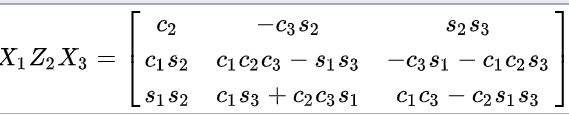

In [5]:
def m_from_e_FM(euler):#for FM
    rphi1, Theta, rphi2 = euler
    c1 = np.cos(rphi1)
    s1 = np.sin(rphi1)
    c2 = np.cos(Theta)
    s2 = np.sin(Theta)
    c3 = np.cos(rphi2)
    s3 = np.sin(rphi2)
    
    g11 = c2
    g12 = c1 * s2 
    g13 = s1 * s2 
    g21 = -c3*s2
    g22 = c1 * c2 * c3 - s1 * s3
    g23 = c1 * s3 + c2 * c3 * s1 
    g31 = s2 * s3
    g32 = -c3 * s1 - c1 * c2 * s3
    g33 = c1 * c3 - c2 * s1 * s3
    g = np.array([[g11, g12, g13], [g21, g22, g23], [g31, g32, g33]])
    return g

In [7]:
gg=m_from_e_FM(FM_ang[0])
print(gg)

[[ 0.05020182  0.58653984  0.80836303]
 [ 0.17333313 -0.80221771  0.57131634]
 [ 0.98358294  0.11143498 -0.14193957]]


In [8]:

tes=m_from_e_tes(Tes_ang)
print(tes)
    

[[ 0.05020186  0.5865398   0.80836306]
 [ 0.17333312 -0.80221775  0.5713163 ]
 [ 0.98358294  0.11143495 -0.14193959]]


In [14]:
def e_from_m(matrix):
    euler_angles = np.zeros(3)

    euler_angles[1] = np.arccos(matrix[2,2])
    if np.abs(euler_angles[1]) < 1e-15:
        euler_angles[0] = np.arctan2(-matrix[1,0], matrix[0,0])
        euler_angles[2] = 0.
    elif np.abs(euler_angles[1] - np.pi) < 1e-15:
        euler_angles[0] = np.arctan2(matrix[1,0], matrix[0,0])
        euler_angles[2] = 0.
    else: 
        euler_angles[0] = np.arctan2(matrix[2,0], -matrix[2,1])
        euler_angles[2] = np.arctan2(matrix[0,2], matrix[1,2])
    if np.abs(euler_angles[0]) < 1e-15:
        euler_angles[0] += 2.*np.pi
    if np.abs(euler_angles[2]) < 1e-15:
        euler_angles[2] += 2.*np.pi
    return euler_angles

In [38]:
rt = m_from_e2(FM_ang)

In [26]:
ex = e_from_m(rt)
print(ex)

[1.68361023 1.71321688 0.95554975]


In [27]:
ww = e_from_m(gg)
print(ww)

[1.6836102 1.7132169 0.9555498]


In [37]:
np.allclose(rt, gg, 0.00001)

True

In [11]:
ll = [3,5,1,60]
ll.index(5)

1

In [12]:
df = pd.DataFrame([4,6,2,4,6,324,46,2,5])

In [13]:
df.index.values.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8]